<a href="https://colab.research.google.com/github/rehgend/EksplorasiHyperparameterCNN_NN/blob/main/Tugas%201B%20-%20Regresi%20Boston%20Housing%20Price%20dengan%20ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>Tugas 1B - Regresi Boston Housing Price dengan ANN**
### **<center>Rahman Indra Kesuma - 33221026**
<br><br>

## **Tahapan 1.**
Memuat library yang dibutuhkan dalam pemrosesan data hingga proses pembelajaran pada Dataset *Boston Housing Price* dengan menggunakan algoritma Artificial Neural Network.

In [18]:
# Library untuk kebutuhan pengaksesan dan pemrosesan awal data
from tensorflow.keras.datasets import boston_housing
from sklearn.model_selection import train_test_split

# Library yang digunakan untuk membuat model dengan arsitektur ANN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

# Library yang digunakan untuk optimizer yang digunakan
from tensorflow.keras.optimizers import RMSprop

# Library untuk melakukan plotting terhasil hasil yang diperoleh
import matplotlib.pyplot as plt
%matplotlib inline

## **Tahapan 2.**
Memuat dataset *Boston Housing Price* dari Keras Built-In Small Dataset sekaligus melakukan slip kembali untuk membagi testing data dan validation data, dan ditambilkan ukuran data dari tiap-tiap kategori.

In [2]:
(x_train, y_train), (x_remaining, y_remaining) = boston_housing.load_data(path="boston_housing.npz", test_split=0.3, seed=113)
x_valid, x_test, y_valid, y_test = train_test_split(x_remaining, y_remaining, test_size=0.5)

print("Ukuran Training Data -> ", len(x_train), "( Max_y : ",max(y_train)," & Min_y : ",min(y_train),")")
print("Ukuran Validation Data -> ", len(x_valid), "( Max_y : ",max(y_valid)," & Min_y : ",min(y_valid),")")
print("Ukuran Testing Data -> ", len(x_test), "( Max_y : ",max(y_test)," & Min_y : ",min(y_test),")")
print("TOTAL DATA = ", len(x_train)+len(x_valid)+len(x_test))

65536/57026 [==================================] - 0s 0us/step
Ukuran Training Data ->  354 ( Max_y :  50.0  & Min_y :  5.0 )
Ukuran Validation Data ->  76 ( Max_y :  50.0  & Min_y :  5.6 )
Ukuran Testing Data ->  76 ( Max_y :  50.0  & Min_y :  8.1 )
TOTAL DATA =  506


## **Tahapan 3**.
Pendefinisian fungsi untuk membentuk arsitektur ANN dengan parameter yang berubah yaitu:
1.   Jumlah Hidden Layer (*NumHiddenLayer*)
2.   Jumlah Hidden Neuron Per-Layer (*NumHiddenNeuronPerLayer*)
3.   Activation Function Per-Layer (*ActivationFuncPerLayer*)


In [10]:
def build_ann_model(NumHiddenLayer, NumHiddenNeuronPerLayer, ActivationFuncPerLayer):
  ann_model = Sequential()
  ann_model.add(Flatten())

  # Pendefinisian pada Hidden Layer
  for idx_layer in range(NumHiddenLayer):
    ann_model.add(Dense(NumHiddenNeuronPerLayer[idx_layer], activation=ActivationFuncPerLayer[idx_layer]))
    
  #Pendefinisian pada Outlut Layer
  ann_model.add(Dense(1, activation='relu'))
  
  return ann_model

## **Tahapan 4**.
Percobaan dalam pembentukan regression model dengan Base Model.

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 13)                0         
                                                                 
 dense_34 (Dense)            (None, 128)               1792      
                                                                 
 dense_35 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 57s 8s/step - loss: 20.1234 - mean_absolute_error: 20.1234 - val_loss: 18.9507 - val_mean_absolute_error: 18.9507
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 18.8540 - mean_absolute_error: 18.8540 - val_loss: 17.8941 - val_mean_absolute_

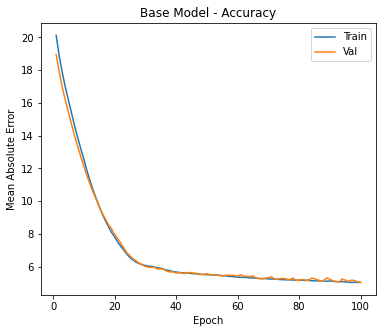

In [30]:
#Nilai Dasar NumHiddenLayer = 1
#Nilai Dasar NumHiddenNeuronPerLayer = [128, ]
#Nilai Dasar ActivationFuncPerLayer = ['sigmoid', ]

BATCH_SIZE = 50
EPOCHS = 100
Label_Epochs = []
for i in range(EPOCHS):
  Label_Epochs.append(i+1)

NumHiddenLayer = 1
NumHiddenNeuronPerLayer = [128]
ActivationFuncPerLayer = ['sigmoid']

opt = RMSprop(learning_rate=0.001)

model_percobaan1 = build_ann_model(NumHiddenLayer, NumHiddenNeuronPerLayer, ActivationFuncPerLayer)
model_percobaan1.build((None, 13))
model_percobaan1.compile(optimizer=opt, loss='mean_absolute_error', metrics=['mean_absolute_error'])
model_percobaan1.summary()
History_Base_Training = model_percobaan1.fit(x_train, y_train, validation_data=(x_valid, y_valid), batch_size=BATCH_SIZE, epochs=EPOCHS)

# Ploting Hasil Penggunaan dari Kullback-Leibler Divergence Function
plt.rcParams['figure.figsize'] = (6.0, 5.0)
plt.plot(Label_Epochs, History_Base_Training.history['mean_absolute_error'])
plt.plot(Label_Epochs, History_Base_Training.history['val_mean_absolute_error'])
plt.title('Base Model - Accuracy')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.savefig('BaseModel-Accuracy.jpg')
plt.show()